# Visualization of results for supervised QEP training

(C) 2024 C. Wanjura and F. Marquardt, MIT license

Cluster Ising model -- Revised manuscript version

This notebook produces all the plots for the cluster Ising model phase sensor example. It uses a soft cutoff for the sensor-system coupling, different from the original manuscript. The only exception are the plots for the analysis of gradient vs shot-noise and nudge strength, which are retained from the original manuscript since they analyze an aspect that is separate from the cutoff (see the other notebook inside the present folder).

The following figures are produced in this notebook, based on the data that were produced via repeated training runs and stored inside the subdirectory "ProductionRunsNew":

- Training progress
- Histograms of final accuracies for different coupling operators
- Plotting results in triangular phase diagram
- Analysis of spatial variations (figures for supplementary material)

## Imports

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
import glob

import qep

In [6]:
# locations of the different training runs
# this is relative to the location of the present notebook

BASEDIR = "ProductionRunsNew/"

# standard training with soft cutoff
dir_default = BASEDIR+"default/*"
# training only on small patches inside each phase
dir_patches = BASEDIR+"patches/*"
# training with only coupling to Z operators in system
dir_zz = BASEDIR+"onlyzz/*"
# training with coupling to both X and Z ops in system
dir_xz = BASEDIR+"xz/*"

# for the analysis in the supplem. material
# compare with cutoff against w/o cutoff
# (select one particular training run for each)
compare_spread_dirname_A = BASEDIR+"default/run10_0.4_0.01_5000_10_50_1_cutoff0.1_soft002"
compare_spread_number_A = 1001
compare_spread_dirname_B = BASEDIR+"default_no_cutoff/run10_0.4_0.01_5000_10_50_1"
compare_spread_number_B = 1001


## Definitions

In [7]:
def plot_point_in_triangle(params,color,title="",show=""):
    plt.figure(figsize=(3,2.5))
    plt.axis('off')
    plt.fill([0,4,2],[0,0,4],color=[0.6,.9,0.7])
    plt.plot([.95,3.05],[2,2],color="black",linewidth=1)
    plt.plot([2,2],[-0.05,2],color="black",linewidth=1)
    plt.text(1.8,-0.6,r"$g_X$")
    plt.text(3.3,2,r"$g_{ZZ}$")
    plt.title(title)
    plt.plot([0,4],[-0.2,-0.2],color="gray",linewidth=1)
    plt.text(-0.1,-0.6,"0")
    plt.text(3.9,-0.6,"4")
    plt.plot([4.2,2.2],[+0,4],color="gray",linewidth=1)
    plt.text(4.2,0.1,"0")
    plt.text(2.4,3.8,"4")
    plt.scatter(params[:,2]+0.5*params[:,1],params[:,1],c=color,s=5**2)
    if show:
        plt.show()

In [8]:
def plot_cluster_Ising_results_inside_phase_triangle(params,values,title="",show=False,  
              red=np.array([1.,0.,0.]),
              green=np.array([0.,1.,0.]),
              blue=np.array([0.,0.,1.])):

    rgb=red[None,:]*values[:,0][:,None] + green[None,:]*values[:,1][:,None] + blue[None,:]*values[:,2][:,None]
    plt.figure(figsize=(3,2.5))
    plt.scatter(params[:,2]+0.5*params[:,1],params[:,1],c=rgb,s=5**2)
    plt.axis('off')
    plt.plot([.95,3.05],[2,2],color="black",linewidth=1)
    plt.plot([2,2],[-0.05,2],color="black",linewidth=1)
    plt.text(1.8,-0.6,r"$g_X$")
    plt.text(3.3,2,r"$g_{ZZ}$")
    plt.title(title)
    plt.plot([0,4],[-0.2,-0.2],color="gray",linewidth=1)
    plt.text(-0.1,-0.6,"0")
    plt.text(3.9,-0.6,"4")
    plt.plot([4.2,2.2],[+0,4],color="gray",linewidth=1)
    plt.text(4.2,0.1,"0")
    plt.text(2.4,3.8,"4")
    if show:
        plt.show()

In [9]:
def plot_cluster_Ising_results_mono_inside_phase_triangle(params,
                    values,title="",show="",  
              red=np.array([1.,0.,0.]),
              green=np.array([0.,1.,0.]),
              blue=np.array([0.,0.,1.])):
    """
    plots values that fall between -1 and +1, properly rescaled
    """
    values = 0.498* ( 1.001 + values ) # shift and rescale
    rgb=green[None,:]*values[:,None]
    plt.figure(figsize=(3,2.5))
    plt.scatter(params[:,2]+0.5*params[:,1],params[:,1],c=rgb,s=5**2)
    plt.axis('off')
    plt.plot([.95,3.05],[2,2],color="black",linewidth=1)
    plt.plot([2,2],[-0.05,2],color="black",linewidth=1)
    plt.text(1.8,-0.6,r"$g_X$")
    plt.text(3.3,2,r"$g_{ZZ}$")
    plt.title(title)
    plt.plot([0,4],[-0.2,-0.2],color="gray",linewidth=1)
    plt.text(-0.1,-0.6,"0")
    plt.text(3.9,-0.6,"4")
    plt.plot([4.2,2.2],[+0,4],color="gray",linewidth=1)
    plt.text(4.2,0.1,"0")
    plt.text(2.4,3.8,"4")
    if show:
        plt.show()
        
        
def plot_cluster_Ising_results_raw_inside_phase_triangle(params,cmap,norm,
                    values,ax=None,title="",show=""):
    """
    plots values that fall between 0 and +1
    """
    if ax is None:
        ax = plt.gca()
    rgb=cmap(norm(values))
    ax.scatter(params[:,2]+0.5*params[:,1],params[:,1],c=rgb,s=5**2)
    ax.axis('off')
    ax.plot([.95,3.05],[2,2],color="black",linewidth=1)
    ax.plot([2,2],[-0.05,2],color="black",linewidth=1)
    ax.text(1.8,-0.6,r"$g_X$")
    ax.text(3.3,2,r"$g_{ZZ}$")
    ax.set_title(title)
    ax.plot([0,4],[-0.2,-0.2],color="gray",linewidth=1)
    ax.text(-0.1,-0.6,"0")
    ax.text(3.9,-0.6,"4")
    ax.plot([4.2,2.2],[+0,4],color="gray",linewidth=1)
    ax.text(4.2,0.1,"0")
    ax.text(2.4,3.8,"4")
    if show:
        plt.show()

In [10]:
def get_all_data_from_dir(DIR):
    """
    Import all results files from the given directory DIR,
    which may be a regular expression that searches through
    several directories.
    """
    data={}
    data['max_choice_accuracy']={}
    data['single_shot_accuracy']={}
    data['sys_sens_couplings']={}
    data['sens_couplings']={}
    
    for filename in glob.glob(DIR + "/results*.npz"):
        results = np.load(filename)
        data['max_choice_accuracy'][filename] = results['max_choice_accuracy']
        data['single_shot_accuracy'][filename] = results['single_shot_accuracy']
        data['sys_sens_couplings'][filename] = results['sys_sens_couplings']
        data['sens_couplings'][filename] = results['sens_couplings']
    return data


In [11]:
def plot_acc(data,acc_type,n_steps=100):
    n_curves = len(data[acc_type])
    all_curves=np.zeros((n_curves,n_steps))

    idx=0
    for file in data[acc_type]:
        curve=data[acc_type][file]
        all_curves[idx]=curve
        idx+=1

    confidence_interval1 = 95
    confidence_interval2 = 80
    confidence_interval3 = 50
    x = np.arange(n_steps)

    for ci in [confidence_interval2, confidence_interval3]:
        low = np.percentile(all_curves, 50 - ci / 2, axis=0)
        high = np.percentile(all_curves, 50 + ci / 2, axis=0)
        plt.fill_between(x, low, high, color='r', alpha=0.2)

    for idx in range(len(all_curves)):
        plt.plot(all_curves[idx], color='yellow', linewidth=2, alpha=0.2)

    plt.plot(np.average(all_curves,axis=0), linewidth=3)
    plt.ylim(0,1.0)
    plt.xlim(0,n_steps)
    
    #plt.gca().set_facecolor("lightgrey")
    plt.margins(x=0)
    

In [12]:
def plot_triangle_for_run(dirname, number):
    """
    Load results from <dirname>/results<number>.npz and plot
    the results of that phase sensor (obtained at the end of training),
    inside the triangle.
    
    returns: accuracy, x_grid_samples, y_pred_grid, phase_sensor
    """
    N_sys=8
    N_sens=2
    phase_sensor = qep.prepare_cluster_Ising_phase_sensor(N_sys,N_sens)

    filename = glob.glob(dirname + "/results"+ str(number) + ".npz")
    if len(filename)==0:
        print("No file found.")
        return None
    
    results = np.load( filename[0] )
    phase_sensor['sens_couplings'] = results['sens_couplings']
    phase_sensor['sys_sens_couplings'] = results['sys_sens_couplings']
    
    accuracy = {}
    accuracy['single_shot_accuracy'] = results['single_shot_accuracy'][-1]
    accuracy['max_choice_accuracy'] = results['max_choice_accuracy'][-1]

    x_grid_samples=qep.get_cluster_Ising_grid_samples(20)
    y_pred_grid=qep.evaluate_phase_sensor_on_batch(phase_sensor,x_grid_samples)

    plot_cluster_Ising_results_inside_phase_triangle(x_grid_samples,y_pred_grid,show=True,
            red=np.array([1.,0.3,0.2]),
            green=np.array([0.,0.7,0.3]),
            blue=np.array([0.,0.4,1.0]))
    
    return accuracy, x_grid_samples, y_pred_grid, phase_sensor

In [13]:
def get_results(dirname,number, coupling_scale=1.0):
    filename = glob.glob(dirname + "/results" + str(number) + ".npz")
    if len(filename)==0:
        print("No file found.")
        return None
    results = np.load(filename[0])

    N_sys=8
    N_sens=2
    phase_sensor = qep.prepare_cluster_Ising_phase_sensor(N_sys,N_sens)

    phase_sensor['sens_couplings'] = results['sens_couplings']
    phase_sensor['sys_sens_couplings'] = coupling_scale * results['sys_sens_couplings']

    x_grid_samples=qep.get_cluster_Ising_grid_samples(20)

    X,Y,Z = phase_sensor['paulis']
    sys_ops = X[:-2] + Y[:-2] + Z[:-2] # all apart the last two

    y_pred, op_pred = qep.evaluate_phase_sensor_on_batch(
        phase_sensor,x_grid_samples, operators = sys_ops )
    
    the_shape = (np.shape(op_pred)[0], 3)
    op_max = np.zeros(the_shape)
    op_min = np.zeros(the_shape)
    op_avg = np.zeros(the_shape)
    
    for idx in range(3): # X,Y,Z
        offset = idx*8
        values = op_pred[:,slice(offset,offset+8)]
        op_max[:,idx] = np.max( values, axis = 1 )
        op_min[:,idx] = np.min( values, axis = 1 )
        op_avg[:,idx] = np.average( values, axis = 1 )
        
    return y_pred, op_pred, {'max': op_max, 'min': op_min, 'avg': op_avg}, results


In [14]:
def compare_spatial_spread(op_idx, dirnames, numbers, labels, show=True):
    idx = op_idx # X Y or Z = 0,1,2
    OPNAME = ["X","Y","Z"][idx]
    plot_label = rf"spatial variation of $\langle {OPNAME} \rangle$"
    first_plot_colorbar_label = rf"average $\langle {OPNAME} \rangle$"
    titles = [ rf"average $\langle {OPNAME} \rangle$" ] + labels

    ops=[[],[]]
    
    for dir_idx,(dirname,number) in enumerate(zip(dirnames,numbers)):
        print(dirname, number)
        _, _, ops[dir_idx], _ = get_results(dirname,number)
        
    norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(3 * 4.5,3))

    my_cmap = mpl.colormaps["Purples"]

    x_grid_samples=qep.get_cluster_Ising_grid_samples(20)

    for dir_idx in range(len(labels)):
        ax_idx = dir_idx + 1
        op = ops[dir_idx]
        values = np.abs(op['max'][:,idx] - op['min'][:,idx])

        plot_cluster_Ising_results_raw_inside_phase_triangle(x_grid_samples, my_cmap, norm,
                values, ax=ax[ax_idx], title=titles[ax_idx] )

        plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=my_cmap),
                 orientation='vertical', ax=ax[ax_idx], label=plot_label)

    op = ops[0]
    values = op['avg'][:,idx]

    new_norm = mpl.colors.Normalize(vmin=-1.0, vmax=1.0)

    plot_cluster_Ising_results_raw_inside_phase_triangle(x_grid_samples, mpl.colormaps["RdYlBu"], new_norm,
            values, ax=ax[0], title=titles[0] )

    plt.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap="RdYlBu"),
             orientation='vertical', ax=ax[0], label=first_plot_colorbar_label)

    if show:
        plt.show()

In [15]:
def spatial_spreads_and_accuracies(dirname, numbers):
    return_values={'spreads': [], 'single_shot_accuracy': [], 'max_choice_accuracy': [],
                  'number': []}
    
    for number in numbers:
        _, _, ops,results = get_results(dirname,number)
        spreads = [np.max(np.abs(ops['max'][:,idx] - ops['min'][:,idx])) for idx in range(3)]
        return_values['spreads'].append(spreads)
        return_values['number'].append(number)
        for type_name in ['single_shot_accuracy','max_choice_accuracy']:
            return_values[type_name].append(results[type_name][-1])
        
    return return_values

In [16]:
def get_data_from_dir(DIR):
    data={}
    data['max_choice_accuracy']={}
    data['single_shot_accuracy']={}
    for result_num in range(1000,1010):
        filename = DIR + "/results" + str(result_num) + ".npz"
        results = np.load(filename)
        data['max_choice_accuracy'][filename] = results['max_choice_accuracy']
        data['single_shot_accuracy'][filename] = results['single_shot_accuracy']
    return data


## Training curves

Training using soft cutoff of 0.1 with a slope of 0.02 for the soft-cutoff cost function. For details, inspect go.py inside the data subdirectories inside ProductionRunsNew.

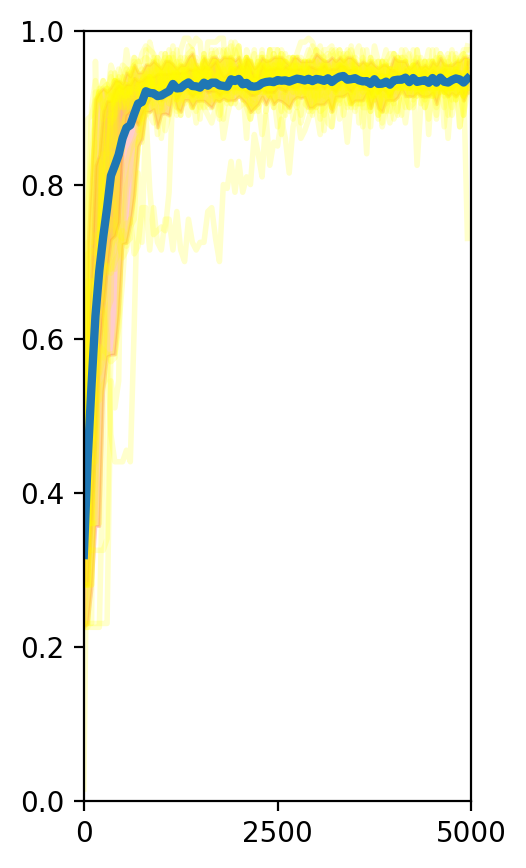

In [17]:
n_steps=100
n_curves=30

data = get_all_data_from_dir(dir_default)

plt.figure(figsize=(2.5,5))
plot_acc(data, 'max_choice_accuracy')

# in total: 5000 batches of 10 samples each (put batch # on x axis):
plt.xticks(ticks=[0,50,100],labels=["0","2500","5000"])
plt.savefig("training_progress_max_choice_default.pdf")
plt.show()

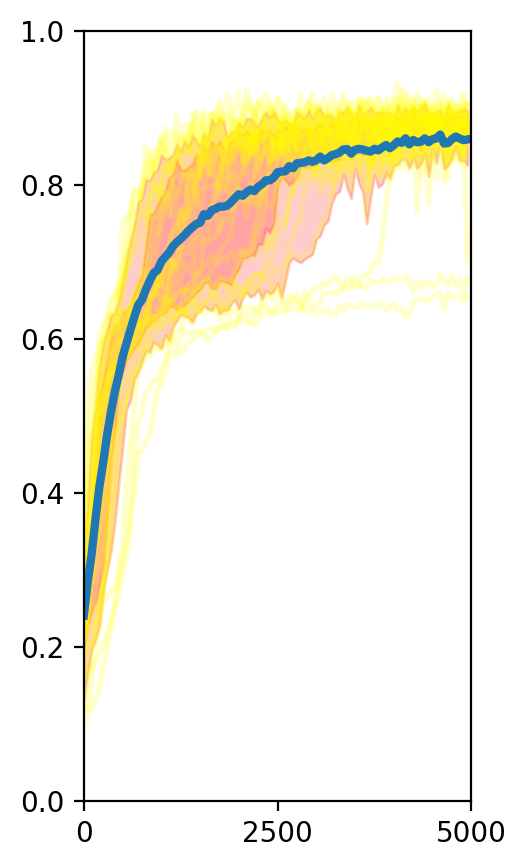

In [18]:
n_steps=100
n_curves=30

data = get_all_data_from_dir(dir_default)

plt.figure(figsize=(2.5,5))
plot_acc(data, 'single_shot_accuracy')

# in total: 5000 batches of 10 samples each (put batch # on x axis):
plt.xticks(ticks=[0,50,100],labels=["0","2500","5000"])
plt.savefig("training_progress_single_shot_default.pdf")
plt.show()


## Plot histograms with final accuracies, for various coupling operators

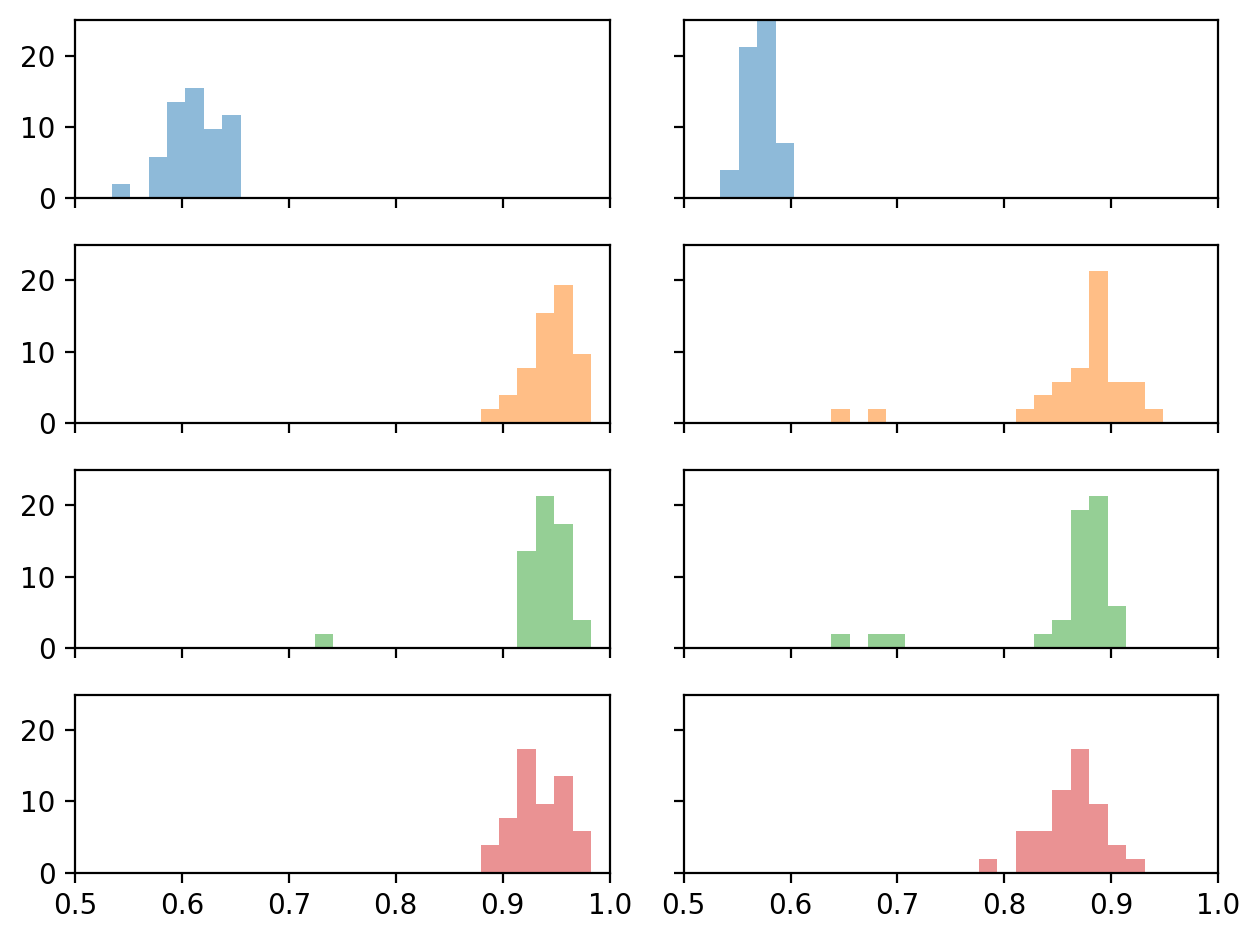

In [19]:
fig,ax=plt.subplots(ncols=2,nrows=4, sharex=True, sharey=True)

set_names=['onlyZZ','XZ','XYZ','patches']
dir_names=[dir_zz,dir_xz,dir_default,dir_patches]
type_names=['max_choice_accuracy','single_shot_accuracy']

final_accuracies={}

for type_name in type_names:
    final_accuracies[type_name] = {}
        
for set_name,dir_name in zip(set_names,dir_names):
    data = get_all_data_from_dir(dir_name)
    for type_name in type_names:
        final_accuracies[type_name][set_name] = []
        for filename in data[type_name]:
            final_accuracies[type_name][set_name].append( data[type_name][filename][-1] )

for idx_set,set_name in enumerate(set_names):
    for idx_type,type_name in enumerate(type_names):
        ax[idx_set][idx_type].hist(final_accuracies[type_name][set_name], 
                                   bins=np.linspace(0.5,1.0,30), 
                                   density=True, alpha=0.5,
                                  color='C'+str(idx_set))
        ax[idx_set][idx_type].set_xlim(0.5,1.0)
        ax[idx_set][idx_type].set_ylim(0.,25)

fig.tight_layout()
plt.savefig("histograms_Zblue_XZorange_XYZgreen_patchesred.pdf")

## Single shot output probabilities vs triangle

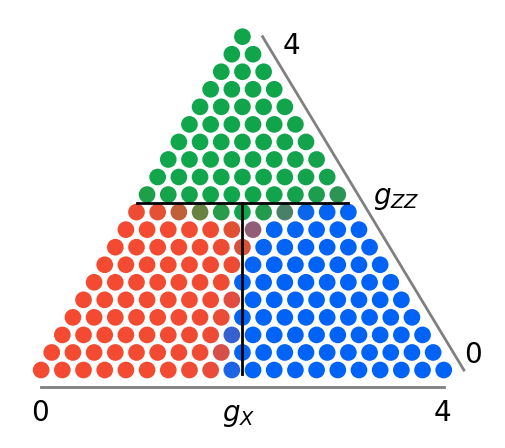

<Figure size 640x480 with 0 Axes>

In [20]:
accuracy, x_grid_samples, y_pred_grid, phase_sensor = plot_triangle_for_run(dir_default, 1001)
plt.savefig("single_shot_output_vs_triangle_default_1001.pdf")

In [21]:
print(accuracy)

{'single_shot_accuracy': 0.880819939403716, 'max_choice_accuracy': 0.975}


## Cutoff vs no cutoff (Spatial variations analysis, appendix)

ProductionRunsNew/default/run10_0.4_0.01_5000_10_50_1_cutoff0.1_soft002 1001
ProductionRunsNew/default_no_cutoff/run10_0.4_0.01_5000_10_50_1 1001


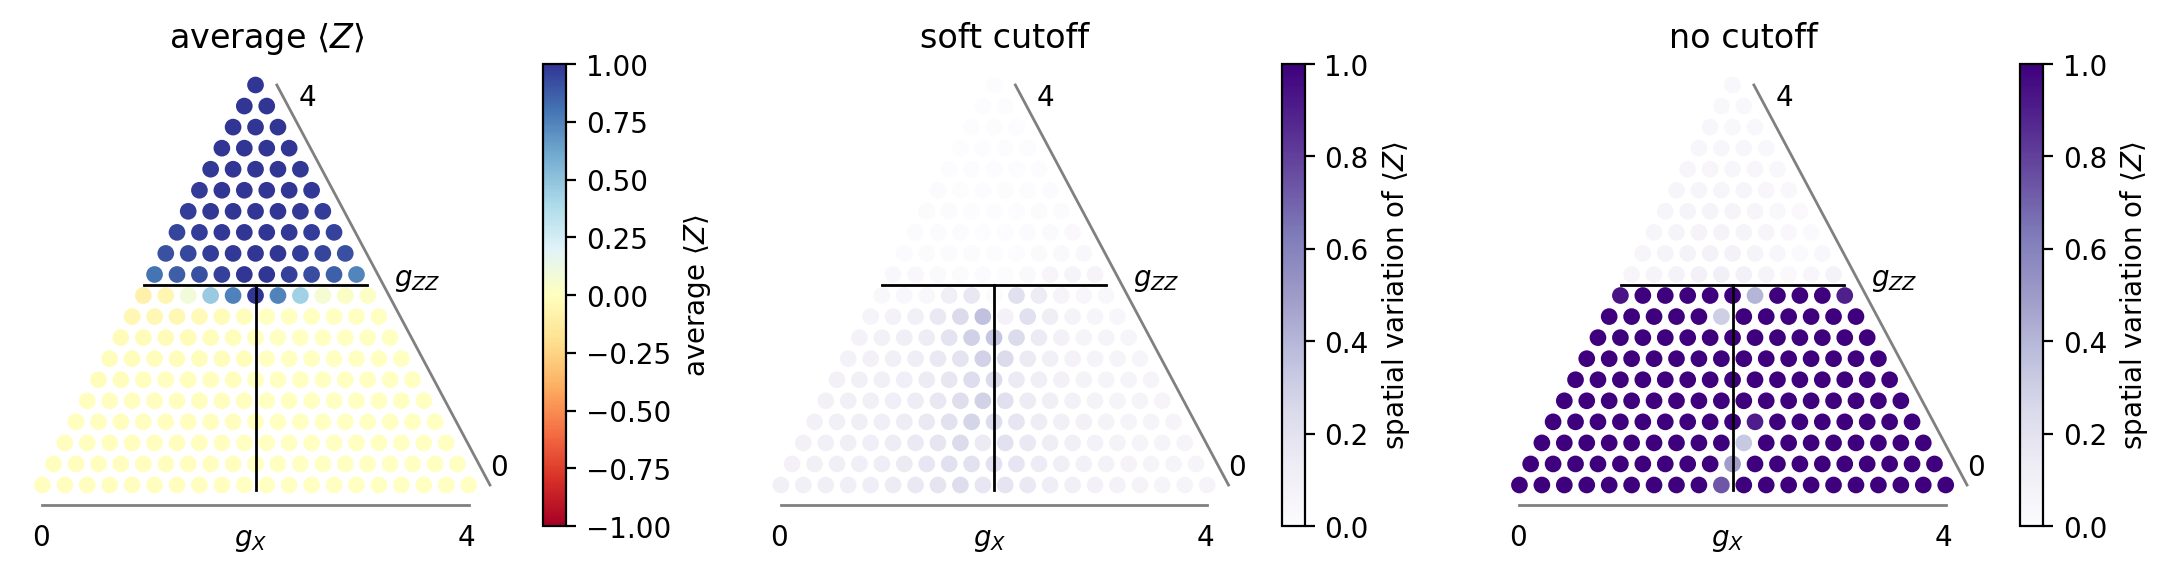

In [22]:
compare_spatial_spread(2, [compare_spread_dirname_A, compare_spread_dirname_B], 
                       [compare_spread_number_A,compare_spread_number_B],
                      ["soft cutoff", "no cutoff"], show=False)
plt.savefig("fig_triangle_comparison_cutoff_z.pdf")
plt.show()

ProductionRunsNew/default/run10_0.4_0.01_5000_10_50_1_cutoff0.1_soft002 1001
ProductionRunsNew/default_no_cutoff/run10_0.4_0.01_5000_10_50_1 1001


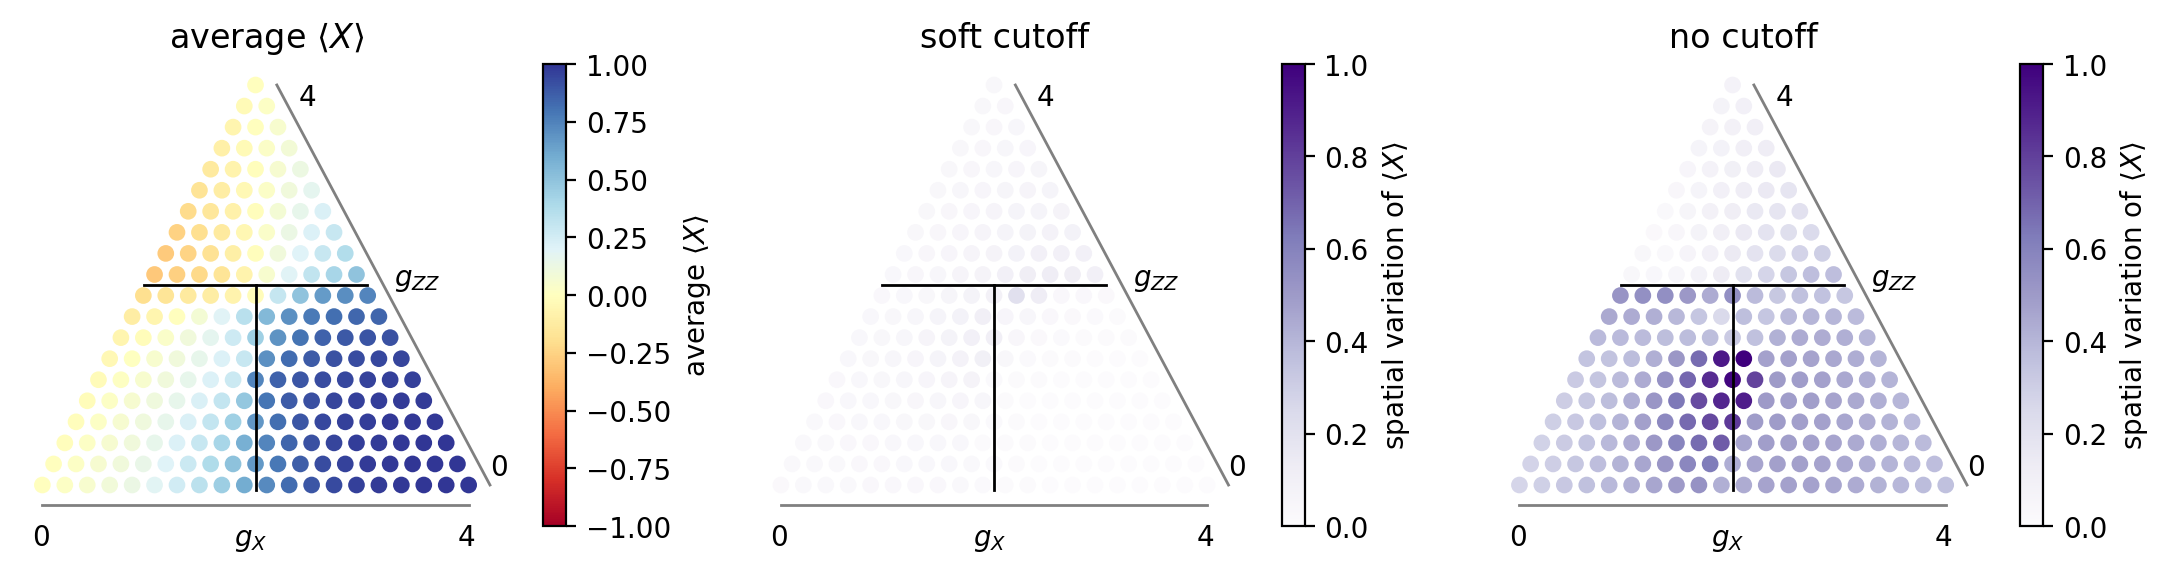

In [23]:
compare_spatial_spread(0, [compare_spread_dirname_A, compare_spread_dirname_B], 
                       [compare_spread_number_A,compare_spread_number_B],
                      ["soft cutoff", "no cutoff"], show=False)
plt.savefig("fig_triangle_comparison_cutoff_x.pdf")
plt.show()

ProductionRunsNew/default/run10_0.4_0.01_5000_10_50_1_cutoff0.1_soft002 1001
ProductionRunsNew/default_no_cutoff/run10_0.4_0.01_5000_10_50_1 1001


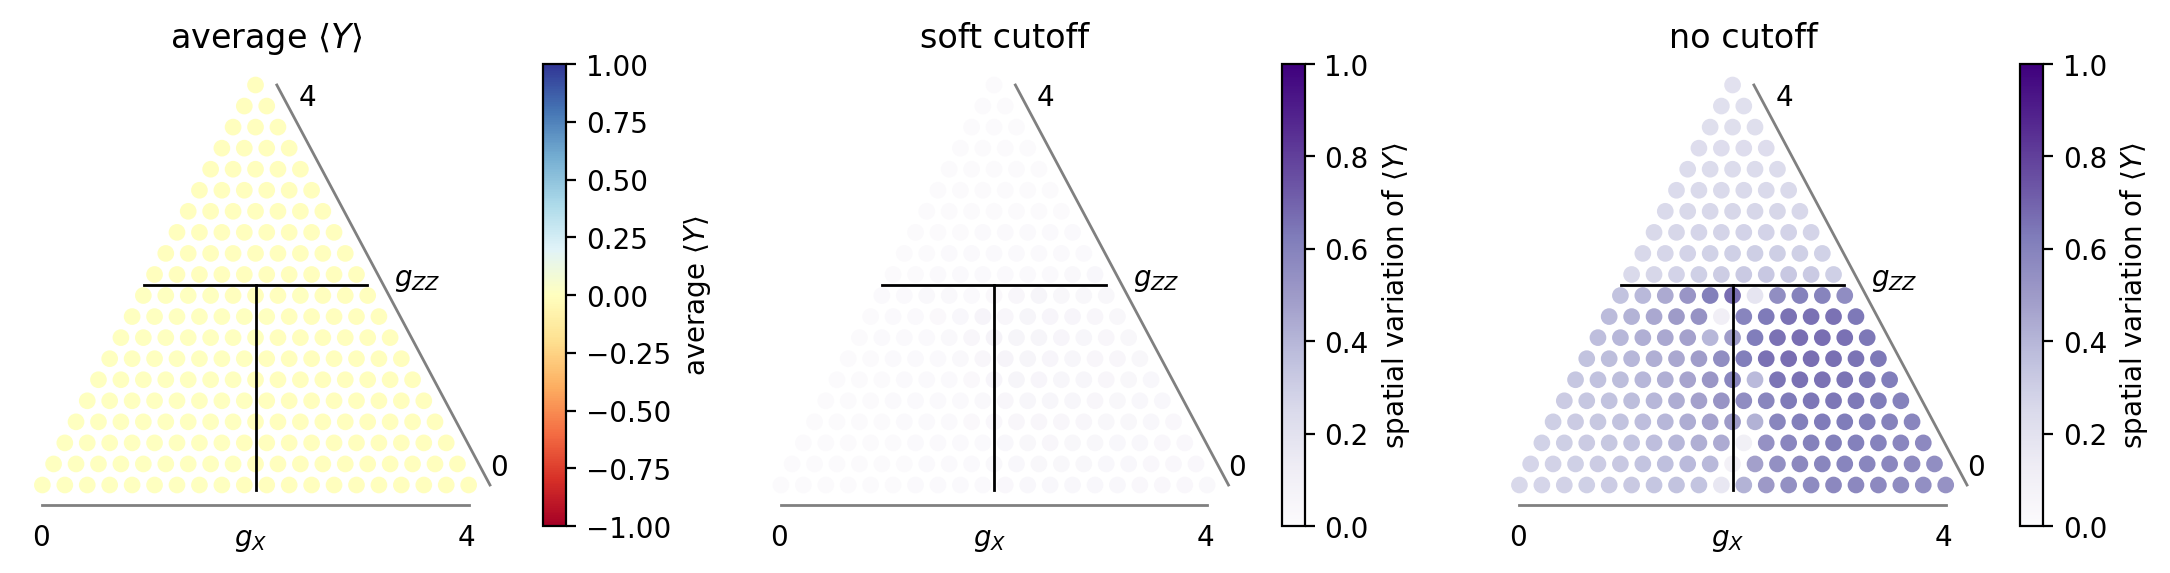

In [24]:
compare_spatial_spread(1, [compare_spread_dirname_A, compare_spread_dirname_B], 
                       [compare_spread_number_A,compare_spread_number_B],
                      ["soft cutoff", "no cutoff"], show=False)
plt.savefig("fig_triangle_comparison_cutoff_y.pdf")
plt.show()

In [25]:
y_predA, op_predA, _, _ = get_results(compare_spread_dirname_A, compare_spread_number_A)
y_predB, op_predB, _, _ = get_results(compare_spread_dirname_B, compare_spread_number_B)
_, op_pred_no_sens, _, _ = get_results(compare_spread_dirname_A, compare_spread_number_A,
                                       coupling_scale = 0.0)


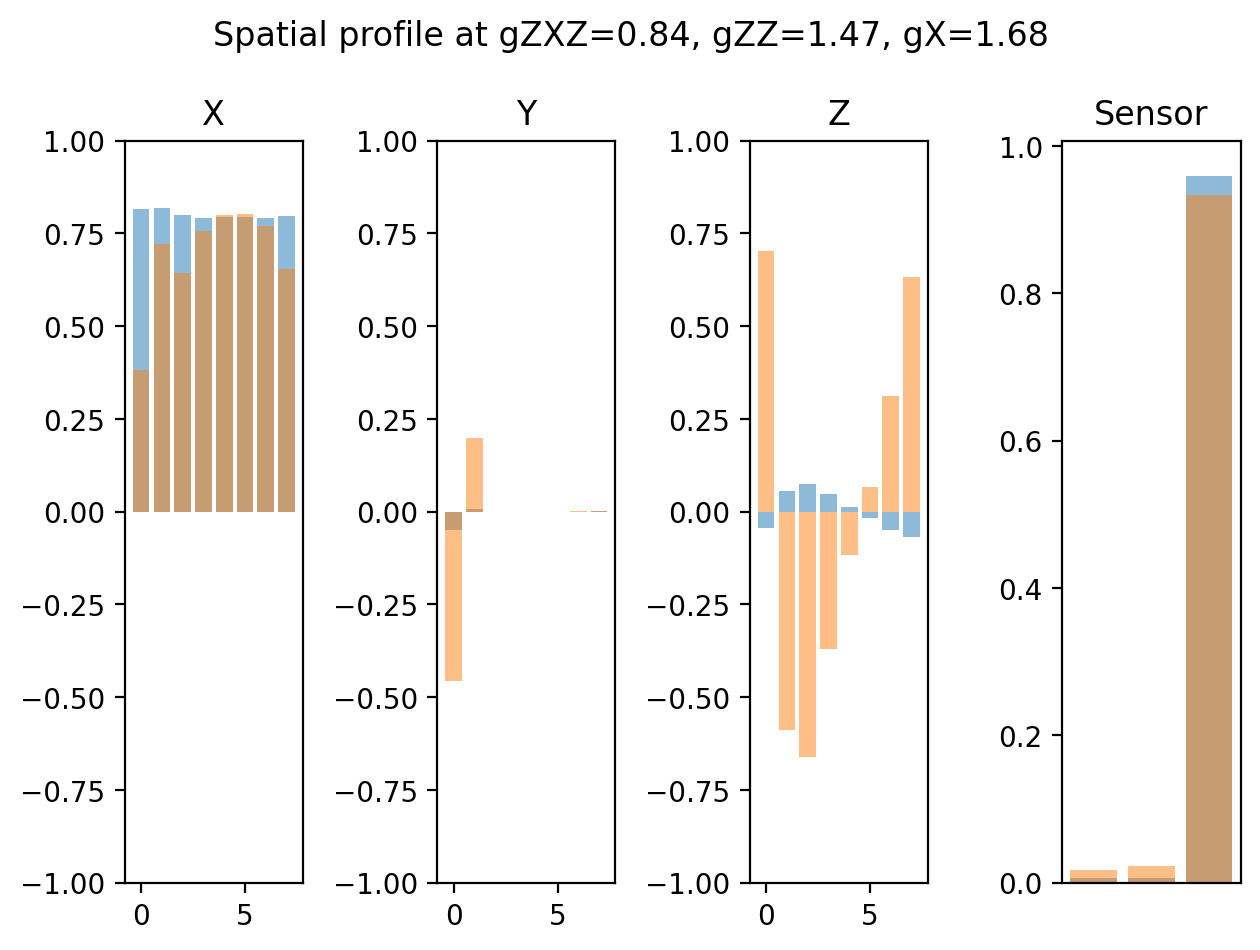

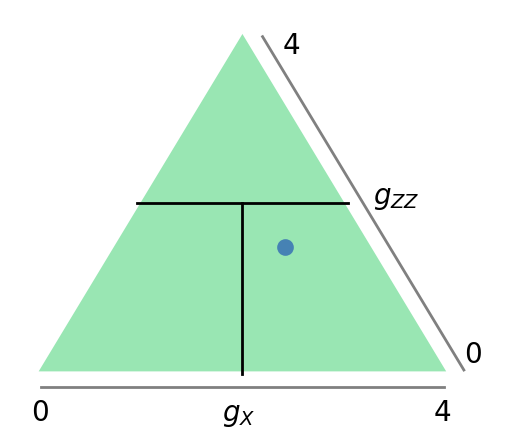

In [26]:
n_sites = 8
idx_triangle = 136 # 82, 111, 136
idx_op = 0
fig,ax = plt.subplots(ncols=4)
op_name = ["X","Y","Z"]

x_grid_samples=qep.get_cluster_Ising_grid_samples(20)

for idx_op in range(3):
    ax[idx_op].bar(np.arange(n_sites), 
        op_predA[idx_triangle,idx_op*n_sites:(idx_op+1)*n_sites], alpha=0.5)
    ax[idx_op].bar(np.arange(n_sites), 
        op_predB[idx_triangle,idx_op*n_sites:(idx_op+1)*n_sites], alpha=0.5)
    # ax[idx_op].bar(np.arange(n_sites), 
    #     op_pred_no_sens[idx_triangle,idx_op*n_sites:(idx_op+1)*n_sites],
    #     alpha=0.3)
    ax[idx_op].set_ylim(-1.0,1.0)
    ax[idx_op].set_title(op_name[idx_op])

ax[3].bar(np.arange(3), y_predA[idx_triangle,:], alpha=0.5)
ax[3].bar(np.arange(3), y_predB[idx_triangle,:], alpha=0.5)
ax[3].get_xaxis().set_visible(False)
ax[3].set_title("Sensor")
fig.suptitle(f"Spatial profile at gZXZ={x_grid_samples[idx_triangle,0]:1.2f}, gZZ={x_grid_samples[idx_triangle,1]:1.2f}, gX={x_grid_samples[idx_triangle,2]:1.2f}")
fig.tight_layout()
plt.savefig(f"fig_comparison_cutoff_spatial_profile{idx_triangle}.pdf")
plt.show()

plot_point_in_triangle(np.array([x_grid_samples[idx_triangle,:]]), "steelblue")
plt.savefig(f"fig_comparison_cutoff_spatial_profile_triangle_location{idx_triangle}.pdf")
plt.show()